<a href="https://colab.research.google.com/github/SnazzyBeatle115/UG54/blob/main/chapters/Assignments/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3



# Write your name and email

*   David Shen
*   ds6870@nyu.edu







# Exercises







We will start by redoing the dataset construction of Assignment 2. ( Feel free to use your previous code!)

Start by importing pandas, numpy, maplotlib, and loading the data set.

The dataset has address

`url='https://github.com/amoreira2/Fin418/raw/refs/heads/main/assets/data/Retuns50stocks.xlsx'`

I strongly recommend you download first and look at the data set.

You should use `read_excel` to get the data that contains t0 stocks plus the market

See here:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html .

Do the followings:

1. Import this dataframe as `df`
    - Use "skip_rows" to skip the initial rows before the data.
    - Figure out what is the code for missing value and change the option `na_values` appropriately


2. Change the name of the column with the date information to "Date"

3. Use `to_datetime` so python understand the column date as a datetime object (you will have to use the option format)

4. Set date as index

5. convert the date from the start of the month to end of the month.

6. Drop any date with a missing observations (it will be just one date)

7. Find the market in the columns and save the stocks in a data frame (df) and the market in a different data frame called df_market

In [2]:
# your code below
# this imports the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

# this points to the location of the data
url='https://github.com/amoreira2/Fin418/raw/refs/heads/main/assets/data/Retuns50stocks.xlsx'


# Import the data
df_ind = pd.read_excel(
    url,
    sheet_name='Retuns50stocks',
    na_values=[],
    usecols="A:AZ"
)


# Rename the column with date information
df_ind.rename(columns={df_ind.columns[0]: 'date'}, inplace=True)

# Convert the date column to datetime
df_ind['date'] = pd.to_datetime(df_ind['date'], format='%Y%m') + MonthEnd(0)

# Set date as the index
df_ind.set_index('date', inplace=True)

df_ind = df_ind.dropna()

# Save market data
df_market = df_ind['Market']

# Check the dataframe
df_ind.info()
# your code below
df_ind.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2000-01-31 to 2014-12-31
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CTL     180 non-null    float64
 1   T       180 non-null    float64
 2   CSCO    180 non-null    float64
 3   FCX     180 non-null    float64
 4   XL      180 non-null    float64
 5   IVZ     180 non-null    float64
 6   AMT     180 non-null    float64
 7   WHR     180 non-null    float64
 8   IR      180 non-null    float64
 9   WFT     180 non-null    float64
 10  YUM     180 non-null    float64
 11  CVS     180 non-null    float64
 12  GD      180 non-null    float64
 13  TYC     180 non-null    float64
 14  EL      180 non-null    float64
 15  MUR     180 non-null    float64
 16  CTAS    180 non-null    float64
 17  CBSA    180 non-null    float64
 18  SNV     180 non-null    float64
 19  CAM     180 non-null    float64
 20  DLTR    180 non-null    float64
 21  CAH     180 non-null

,CTL,T,CSCO,FCX,XL,IVZ,AMT,WHR,IR,WFT,...,SWK,DVN,TMO,PEP,LNC,EMR,MLM,CCI,NU,Market
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-18.4697,-11.5513,2.2170,-17.4556,-12.5301,-4.0929,17.3824,-10.4707,-14.5289,-5.9468,...,-16.5975,6.8441,15.4167,-3.1915,-6.9312,-4.0305,2.4390,-1.5564,-0.3040,-3.9612
2000-02-29,-12.9450,-11.2245,20.7192,-21.1470,-9.8898,5.3057,37.2822,-6.1760,-18.2311,19.8003,...,-8.4577,6.0498,-9.7473,-5.8608,-25.2115,-16.6039,-15.1667,1.9763,-7.7439,3.1777
2000-03-31,10.5502,10.6732,16.9740,-12.2727,36.9397,24.4250,0.2538,7.9402,15.4976,30.0000,...,15.6304,30.5034,30.4000,8.9805,21.2670,16.5981,33.8028,17.4419,14.2857,5.3500
2000-04-30,-34.0067,4.6083,-10.3274,-20.2073,-13.9955,0.9670,-5.6962,11.0874,6.0734,2.7153,...,11.8483,-0.9009,-4.9080,5.1971,4.7836,3.2941,11.5789,1.3201,0.0000,-5.9530
2000-05-31,10.3980,-0.2853,-17.8724,-4.5455,25.8793,-8.7719,-20.2685,-12.4338,-2.5672,6.0000,...,-8.8983,24.2857,-4.1935,11.4140,11.3106,8.1686,-7.4198,-31.7590,3.3721,-3.8871


**Exercise 1. Portfolio Moments**

Construct a portfolio that equal weights the first five stocks. Compute this portfolio variance in this sample.  



In [3]:
# your code below

weights = np.ones(5,)/5
portfolio_return = df_ind.iloc[:, :5]@weights
portfolio_return.var()

45.59624876400141

**Exercise 2. Annualize it**

Report this number in yearly units



In [4]:
portfolio_return.var()*12

547.1549851680169

**Exercise 3. Function 1**


Construct a function that takes as input the number of stocks in the portfolio, lets call that parameter N, and outputs the (yearly) variance of the portfolio that equal weight the first N stocks

In [5]:
# your code below

def var_of_portfolio(N):
  weights = np.ones(N,)/N
  portfolio_return = df_ind.iloc[:, :N]@weights
  return portfolio_return.var()*12

**Exercise 4. Function 2**


Construct a function that takes as input the number of stocks in the portfolio and also, lets call that parameter N, and outputs the (yearly) variance of the portfolio that equal weight N randomly picked stocks

In [6]:
# your code below
# print(df_ind.iloc[:, np.random.choice(df_ind.column)].info())

def rand_var_of_portfolio(N):
  weights = np.ones(N,)/N
  portfolio_return = df_ind.sample(n=N, axis=1)@weights
  return portfolio_return.var()*12


**Exercise 5. A simulation**


Construct a function that that takes as an input the number of stocks N and then use the function above (excercise 4) to simulate 100 different portfolios and output the average of these 100 portfolios

In [7]:
import numpy as np

# your code below
def simulate_var(N):
  variances = []
  for i in range(100):
    variances.append(rand_var_of_portfolio(N))
  return np.mean(variances)

**Exercise 6. A plot**


Call the function above for N=1 to N=50 and plot the variance as function of N

Text(0, 0.5, 'Average Yearly Portfolio Variance (%)')

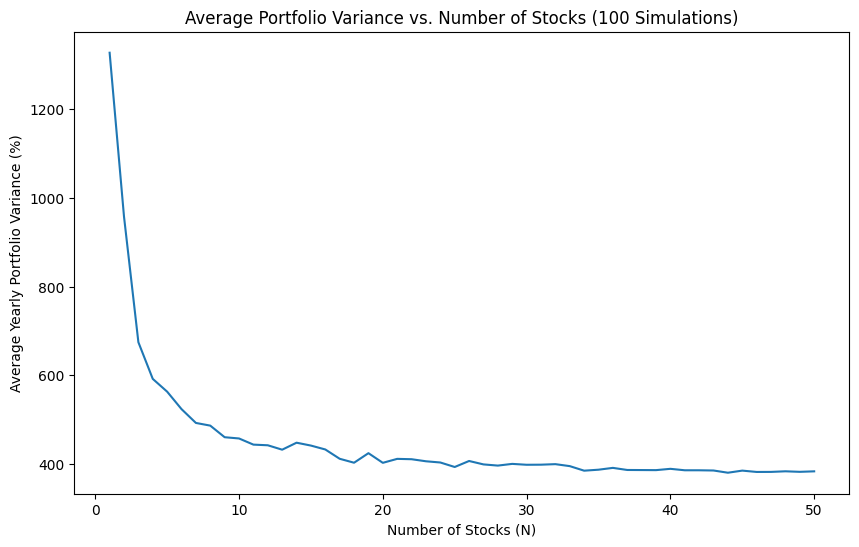

In [8]:
# your code below


fig, ax = plt.subplots(figsize=(10, 6))
total_var = [simulate_var(N) for N in range(1, 51)]
ax.plot(range(1, 51), total_var, label="Total Variance")
ax.set_title('Average Portfolio Variance vs. Number of Stocks (100 Simulations)')
ax.set_xlabel('Number of Stocks (N)')
ax.set_ylabel('Average Yearly Portfolio Variance (%)')

**Exercise 7. the market**


Add the market variance to the plot as an horizontal line to the plot you made above

Market Variance: 254.90037959357852
Max Variance: 1327.4777987636146


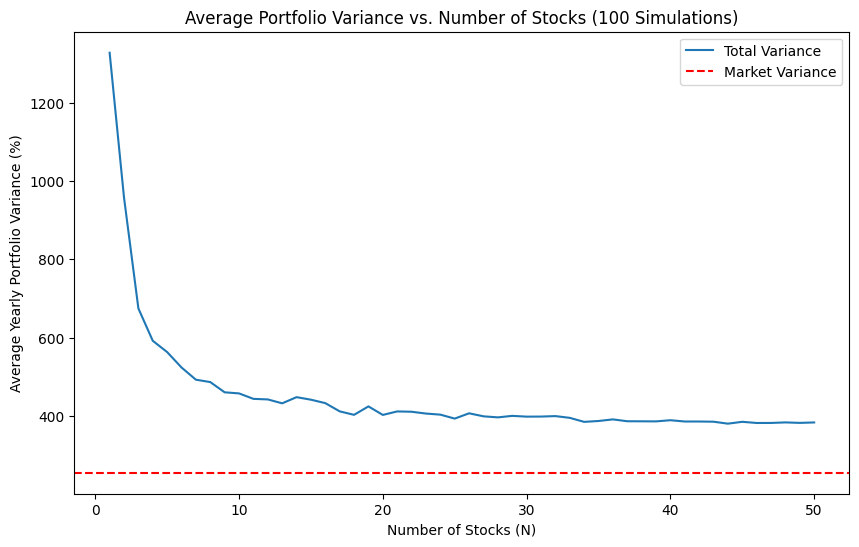

In [9]:
# your code below
market_variance = df_market.var() * 12
print(f"Market Variance: {market_variance}")
print(f"Max Variance: {max(total_var)}")

ax.axhline(market_variance, color='r', linestyle='--', label='Market Variance')
ax.legend()
fig

**Exercise 8. Interpretation**


Explain what you see in the plot. Try to articulate what you think is happening

The variance is very high when we have few stocks. For example, when we have N of 1, we have annual variance of around 1300%. For each stock that we add, the variance decreases. But there are diminishing returns, and the rate that the variance decreases is slowing. They are all above the market variance because there is idiosyncratic risk. I think all of these variance numbers are very high.

**Exercise 9. A decomposition**


We now want to build a function that outputs only the terms due to the variance terms

That is, instead of computing $Var(WR)=W@Var(R)@W=\sum_i\sum_jW_iW_jCov(R_i,R_j)$ which gives you the variance of a portfolio with weight W,


I want you do compute $\sum_iW_i^2Var(R_i)$, this component of the portfolio variance that comes only from the variance terms

Then subtract this term from the total variance term


Show the three lines in a plot as functions of N (1. the total variance (and also the market like in exercise 7), 2. the component coming only from the variance terms, and 3. the residual (the component due to the covariance terms) )



In [10]:
# your code below


def ann_var_terms(N):
  weights = np.ones(N,)/N
  sum = np.sum(weights**2 * df_ind.sample(n=N, axis=1))
  return sum*12


def simulate_var_terms(N):
  variances = []
  for i in range(100):
    variances.append(rand_var_of_portfolio(N))
  return np.mean(variances)

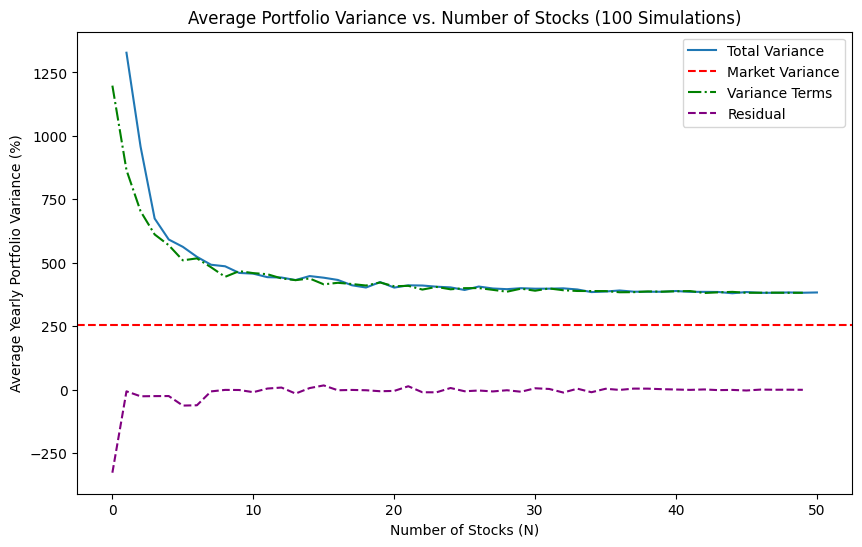

In [11]:
var_terms = [simulate_var_terms(N) for N in range(1, 51)]
residual = [simulate_var(N) - simulate_var_terms(N) for N in range(1, 51)]

ax.plot(var_terms, label='Variance Terms', color='green', linestyle='-.')
ax.plot(residual, label='Residual', color='purple', linestyle='--')
ax.legend()
fig

**Exercise 10. Interpretation 2**


looking at this new plot, what do you learn? What does that imply about portfolio construction?


Adding more stocks lowers the total variance of the portfolio but the residual from covariance terms does not decrease. So systematic risk from the co movement of the stocks with the market is not diversifiable.

**Exercise 11. Factor betas**

Randomly select 10 stocks from `df` and draw a figure that plots the returns of these industries along with the market return.

Just by looking, which seems seems to have the highest beta?

Why is it important to measure beta correctly? i.e. explain how you can use beta to improve a trade that you have in one of these companies

Text(0, 0.5, 'Return (%)')

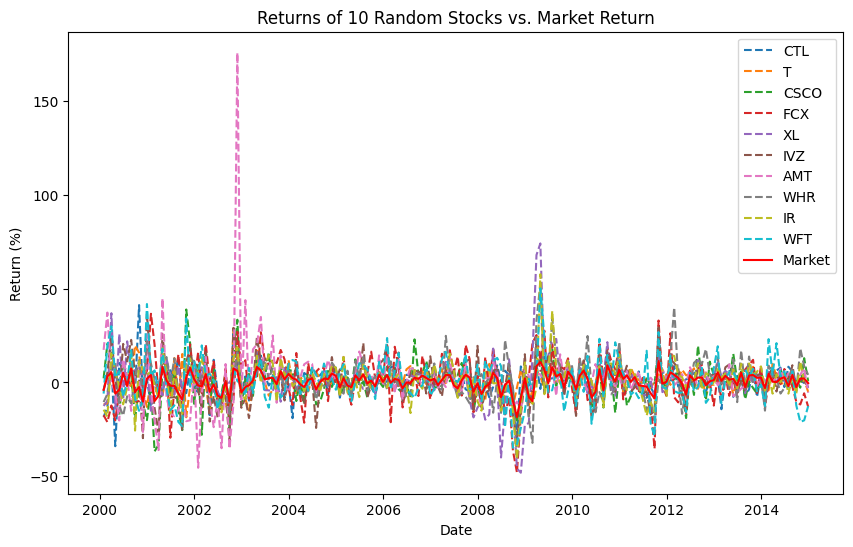

In [12]:
# Your code below
plot, ax = plt.subplots(figsize=(10, 6))

# stocks = df_ind.sample(n=10, axis=1)
stocks = df_ind.iloc[:, :10]

ax.plot(stocks, linestyle='--')
ax.plot(df_market, label='Market', color='red', linestyle='-')
ax.legend(stocks.columns.tolist() + ['Market'])
ax.set_title('Returns of 10 Random Stocks vs. Market Return')
ax.set_xlabel('Date')
ax.set_ylabel('Return (%)')

It's hard to see, but I think WFT has the highest beta. You must measure beta correctly because it is the basis of how much the stock is moving with the market. You can use betas to see how much of a position you have in a market. For example, if the portfolio is at 1.5 beta, you can short a company with 1 beta to be at 0.5 beta.

**Exercise 12. Factor betas 2**

Run regressions of all stocks in `df` on the market return you saved in `df_market`. Include intercepts in the regressions.

Just follow the code below to run regressions.

The coefficients to the market return are the betas to each industry.

Now suppose you are a fund manager and you have a mandate to keep your beta equal to 0.5.

Provide portfolio weights based on the regressions above to hit the mandate beta.

Give at least *five* such portfolios that satisfy that restriction. At least one of these portfolios has to play in more than one stock at a time.

In [13]:
import statsmodels.api as sm

X = df_market
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_ind['ACAS']
model = sm.OLS(y, X).fit(dropna=True)
print(model.summary())

# Your code below
df_alphas = pd.DataFrame()
df_betas = pd.DataFrame()
for stock in df_ind.columns:
  model = sm.OLS(df_ind[stock], X).fit(dropna=True)
  df_alphas.loc['alpha', stock] = model.params['const']
  df_betas.loc['beta', stock] = model.params['Market']
  # print(model.params['Market'])

df_betas

                            OLS Regression Results                            
Dep. Variable:                   ACAS   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     51.87
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           1.61e-11
Time:                        17:17:34   Log-Likelihood:                -708.16
No. Observations:                 180   AIC:                             1420.
Df Residuals:                     178   BIC:                             1427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8277      0.932      0.888      0.3

,CTL,T,CSCO,FCX,XL,IVZ,AMT,WHR,IR,WFT,...,SWK,DVN,TMO,PEP,LNC,EMR,MLM,CCI,NU,Market
beta,0.726946,0.529153,1.530779,1.569894,1.438681,2.036247,1.352478,1.442238,1.46115,1.513599,...,1.100645,0.957763,0.958138,0.351366,1.826397,1.035139,0.871716,1.672453,0.446771,1.0


In [23]:
# Find five portfolios

target_beta = 0.5

portfolios = [df_betas.sample(n=2, axis=1) for _ in range(5)]

weights = []

# balance weights
for p in portfolios:
  betas = p.values.flatten()
  A = np.array([
      [1., 1.],
      [betas[0], betas[1]]
  ])
  b = np.array([1., target_beta])
  w = np.linalg.solve(A, b)
  weights.append(pd.Series(w, index=p.columns))

# print
print("Five portfolios:")
for i, w in enumerate(weights):
  print(f"Portfolio {i+1}: \n{w}")
  print(f"Sum of weights: {w.sum()}")
  print(f"Beta: {portfolios[i].loc['beta'].values@w}")
  print()


Five portfolios:
Portfolio 1: 
CTL   -8.068546
YUM    9.068546
dtype: float64
Sum of weights: 1.0
Beta: 0.5

Portfolio 2: 
ACAS    0.1741
EXC     0.8259
dtype: float64
Sum of weights: 1.0
Beta: 0.5

Portfolio 3: 
ACAS    1.501523
CAR    -0.501523
dtype: float64
Sum of weights: 0.9999999999999999
Beta: 0.5

Portfolio 4: 
CTAS    1.417129
CCI    -0.417129
dtype: float64
Sum of weights: 1.0
Beta: 0.5000000000000002

Portfolio 5: 
CTAS    1.539373
TKR    -0.539373
dtype: float64
Sum of weights: 1.0
Beta: 0.5



**Exercise 13. Factor risk**

Find beta-hedged portfolio returns using the five mandate portfolios you provided in Exercise 12.

Draw a plot drawing these portfolio returns together.(i.e. spy in the x-axis, hedge portfolio in the y)

Do they show any co-movement?  Can you say they are all "risk free"? In what sense they are free of risk and what sense they are not?

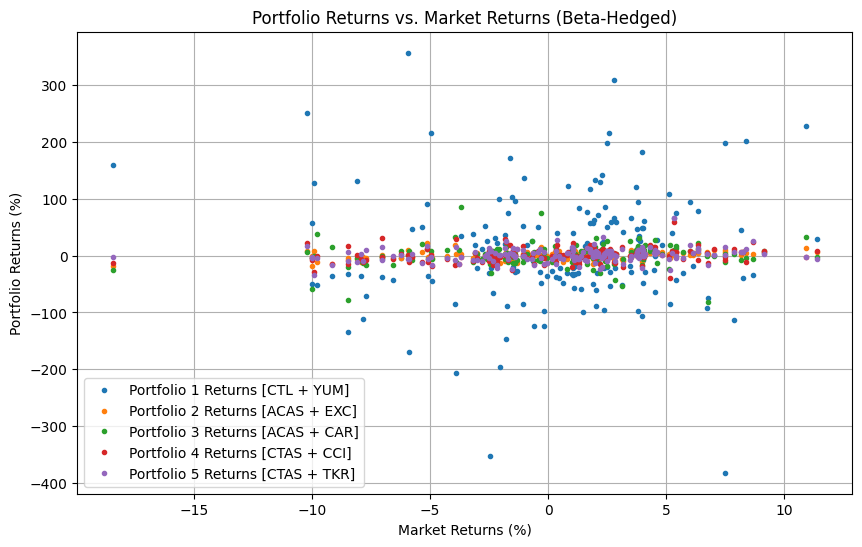

In [26]:
# Your code below

portfolio_returns = []
for i, p_df in enumerate(portfolios):
  tickers = p_df.columns.tolist()
  returns = df_ind[tickers]
  portfolio_returns.append(returns@weights[i])

plot, ax = plt.subplots(figsize=(10, 6))

for i, pr in enumerate(portfolio_returns):
    tickers = portfolios[i].columns.tolist()
    ax.plot(df_market, pr, '.', label=f'Portfolio {i+1} Returns [{tickers[0]} + {tickers[1]}]')



ax.set_title('Portfolio Returns vs. Market Returns (Beta-Hedged)')
ax.set_xlabel('Market Returns (%)')
ax.set_ylabel('Portfolio Returns (%)')
ax.legend()
ax.grid(True)
plot.show()


They show a bit of comovement, this is because they all have 0.5 beta so they have some exposure to the market. When the market moves, they all will move with it a little. In this sense, they have systematic risk. They also have idiosyncratic risk from the assets. Therefore they are not risk free. A portfolio with a market beta of 0 would be free from systematic risk.

**Exercise 14. Alphas**

Let us assume that the risk-free rate is fixed at 0. (recall that we are working with returns here, so the intercept is not alpha, but alpha+(1-beta)(average rf))

Then, the intercepts to regression in Exercise 12 can be interpreted as alphas

Find the largest alpha stock and the lowest alpha stock from Exercise 12.

If you were trying to pick one trade, would picking up the asset with the highest alpha the best that we can do?

What other consideration might be relevant for your "best" strategy



In [16]:
# Your code below


print(f"Largest {df_alphas.max(axis=1)}")
print(f"Lowest {df_alphas.min(axis=1)}")


Largest alpha    1.428183
dtype: float64
Lowest alpha   -1.088209
dtype: float64


The highest alpha would probably not be the best we can do, although it might be pretty good. But the volitility of the return might also be high. The best that we can do is probably maximize the Sharpe Ratio of our trade.

**Exercise 15. optional**

Suppose you pick the portfolio that is best according to the criteria you outline above. Is that the best that we can do? Discuss how you could further improve your portfolio